# Sentiment Analysis

Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea.

<img src = "sentiment_analysis.jpg">

### Types of sentiment analysis:

<img src = "whatis-sentiment_analysis.png">


1. Fine-grained sentiment analysis provides a more precise level of  polarity by breaking it down into further categories, usually very positive to very negative. This can be considered the opinion equivalent of ratings on a 5-star scale.

2. Emotion detection identifies specific emotions rather than positivity and negativity. Examples could include happiness, frustration, shock, anger and sadness.

3. Intent-based analysis recognizes actions behind a text in addition to opinion. For example, an online comment expressing frustration about changing a battery could prompt customer service to reach out to resolve that specific issue.

4. Aspect-based analysis gathers the specific component being positively or negatively mentioned. For example, a customer might leave a review on a product saying the battery life was too short. Then, the system will return that the negative sentiment is not about the product as a whole, but about the battery life.


### Applications of sentiment analysis:


Sentiment analysis tools can be used by organizations for a variety of applications, including:

* Identifying brand awareness, reputation and popularity at a specific moment or over time.
* Tracking consumer reception of new products or features.
* Evaluating the success of a marketing campaign.
* Pinpointing the target audience or demographics.
* Collecting customer feedback from social media, websites or online forms.
* Conducting market research.
* Categorizing customer service requests.

## Tools are used :

1. Natural language processing (NLP) : it refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

2. Pandas : pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series

3. NumPy : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

4. Matplotlib : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK

5. Restaurant Reviews (DataSet) : This Dataset contains two rows Customer Reviews and Liked.Customer reviews tells us about the reviews given by the customers for a food in restaurant and liked column tells about whether they liked the food or not.
6. Twitter Review (dataset) : This Dataset contains twitter tweets by user and also sentiment about this tweet

# Source Code

## Libraeies

In [1]:
# Text handling  
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Dataset handling
import pandas as pd
import numpy as np

# Data visulazing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Traing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# Exploratory data analysis (EDA)

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [3]:
dataset.shape

(1000, 2)

* In the above dataset we have 1000 rows and 2 columns 

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


* In data we have 2 columns(attributes)
  1. Review : In this column we have review in text format
  2. Liked  : In this column we have sentiment in numbers format
     * 1 indicates Positive review 
     * 0 Indicates Negative review 

In [5]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

* In data dosent have any Null values

# Cleaning Text

In [6]:
def text_clean(row):
    text = re.sub('[^a-zA-z]',' ',row)        # Removing special charechters in text
    text = text.lower()                       #Converting text into Lower case letters
    text = text.split()                       #Splitting words
    stem = PorterStemmer()                    #selecting model for finding root of a word
    all_stopwords = stopwords.words('english') #Selecting english stopwords
    all_stopwords.remove('not')
    review = []
    for word in text :
        if word not in set(all_stopwords):
            review.append(stem.stem(word))
    review = ' '.join(review)
    return review

In [7]:
text = []
for i in range(len(dataset)):
    row = dataset['Review'][i]
    text.append(text_clean(row))

In [8]:
text

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Selecting features

In [9]:
cv = CountVectorizer()
x = cv.fit_transform(text).toarray()
y = dataset.iloc[:,-1].values

In [10]:
len(x[0])

1566

# Splitting Data

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

# Model Training

In [12]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

# Model Testing

In [13]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accu = accuracy_score(y_test,y_pred)
print("model accuracy is :",accu)

model accuracy is : 0.73


# Model visualizing

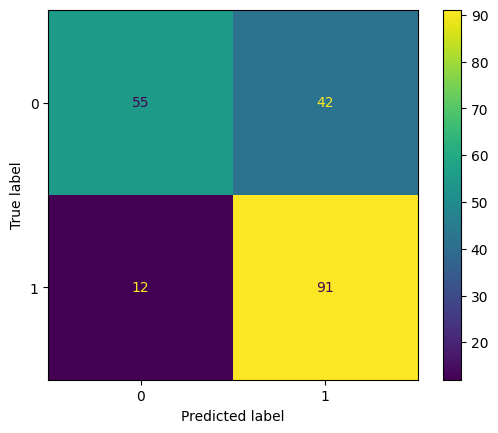

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Testing

In [15]:
def test(review):
    new_review = review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = classifier.predict(new_X_test)
    if new_y_pred[0]==1:
        print("Happy")
        print("\U0001f600")
    else:
        print("Not Happy")
        print("\U0001F621")

In [16]:
review=input("write your review")
print("\n\n")
test(review)

write your reviewdelicious food good hygiene



Happy
😀
